In [1]:
import GPy
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#乱数の生成
X = np.random.uniform(-5.,5.,(30,1)) # [-5,5]の範囲で30個(1次元配列）の入力値
y = 0.2*X + 0.3*np.sin(X)+np.random.randn(30,1)*0.5 # yにσ=0.5のガウスノイズの付与

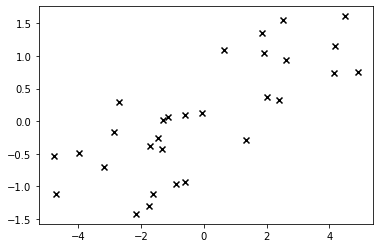

In [3]:
plt.scatter(X,y,marker="x",c="black")

In [4]:
#線形回帰の実装
#w=(Φ^(T)Φ)^(-1)Φ^(T)y
f0 = np.array(X) #基底関数 x
f1 = np.array([np.sin(i) for i in X]) #基底関数 sin(x)
phi = np.concatenate([f0,f1],axis = 1) #phi=fof1 
w0 = np.linalg.inv(np.dot((phi.T),phi)) #w0 =  (Φ^(T)Φ)^(-1)
w1 = np.dot(w0,phi.T)
w = np.dot(w1,y)

(-2.0, 2.0)

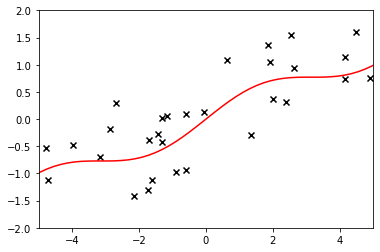

In [5]:
#求めた重みベクトルを用いて線形回帰の予測結果をプロット
def linear_regression(x):
    return w[0]*x + w[1]*np.sin(x)
X_pred = np.linspace(-10,10,100)
y_pred = [linear_regression(x) for x in X_pred]
plt.scatter(X,y,marker="x",c="black")
plt.plot(X_pred,y_pred,c="red")
plt.xlim(-5,5)
plt.ylim(-2,2)

In [6]:
#ガウス過程に用いるカーネル(パラメータは後で最適化)
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

In [7]:
#GP回帰モデル
model = GPy.models.GPRegression(X,y,kernel)

In [8]:
# モデルのパラメータ
print(model)


Name : GP regression
Objective : 37.932960260769725
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


In [9]:
from IPython.display import display
display(model)

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


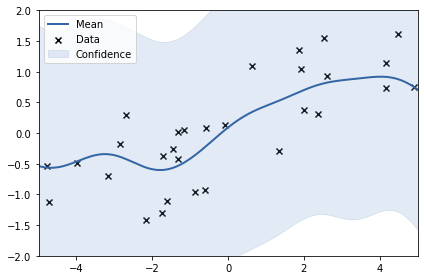

In [10]:
#GP回帰の結果（パラメータ最適化なし）
GPy.plotting.change_plotting_library('matplotlib')
model.plot()
plt.xlim(-5,5)
plt.ylim(-2,2)
plt.show()

In [11]:
#パラメータ最適化
model.optimize(messages=True)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0001   3.793296e+01   3.124163e+01 
    00s02  0005   2.945809e+01   1.594695e+00 
    00s06  0012   2.861634e+01   3.768228e-08 
    00s07  0014   2.861634e+01   1.173482e-10 
Runtime:     00s07
Optimization status: Converged



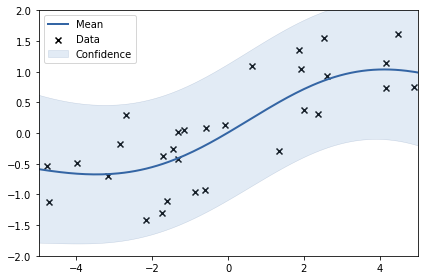

In [12]:
#パラメータ最適化後の結果をプロット
GPy.plotting.change_plotting_library('matplotlib')
model.plot()
plt.xlim(-5,5)
plt.ylim(-2,2)
plt.show()

In [13]:
#真値
def true_function(x):
    return 0.2*x + 0.3*np.sin(x)
true_y = [true_function(x) for x in X_pred]

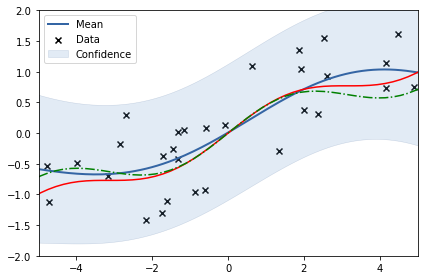

In [14]:
#真値、線形回帰の予測、ガウス過程回帰の結果をプロット
GPy.plotting.change_plotting_library('matplotlib')
model.plot()
plt.plot(X_pred,y_pred,c="red")
plt.plot(X_pred,true_y,c="green",linestyle="dashdot")
plt.xlim(-5,5)
plt.ylim(-2,2)
plt.show()

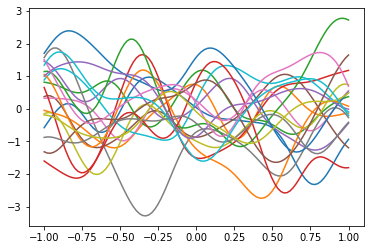

In [15]:
#おまけ：カーネルから関数をサンプリングする様子
kernel2 = GPy.kern.RBF(input_dim=1,variance=1, lengthscale = 0.2)
np.random.seed(seed=1234)
N = 100
x_lin = np.linspace(-1,1,N) # [-1,1]まで等間隔（線形）にN個の要素を持つ配列
x_lin = x_lin[:,None] #行列にしておく for cov
mu = np.zeros(N) # 平均０ベクトル
cov = kernel2.K(x_lin,x_lin) 
y_lin = np.random.multivariate_normal(mu,cov,size=20)
fig = plt.figure()
ax = fig.add_subplot(1,1,1) #全体描画
for i in range(20):
    ax.plot(x_lin[:],y_lin[i,:]) #100plot×20関数